Initial Analysis
----------------
This notebook contains some initial analysis on the articles that currently exist within Axelbib.

In [1]:
import requests
import pandas as pd
import collections
import json
from pandas.io.json import json_normalize

In [5]:
from password import password 

ImportError: No module named 'password'

Getting the data
----------------
For speed reasons we do not want to ping Axelbib repetitive. Thus this section will be perform when needed
and it pulls all the articles from Axelbib and spits back a json file.

In [ ]:
db = []
req = requests.get('http://127.0.0.1:8000/article/', auth=("nikoleta", password))
results_of_req = req.json()['results']
db = pd.io.json.json_normalize(results_of_req)

In [8]:
for page in range(27):
    req = requests.get('http://127.0.0.1:8000/article/?page={}'.format(page+2), auth=("nikoleta", password))
    results_of_req = req.json()['results'] 
    db = db.append(pd.io.json.json_normalize(results_of_req))

In [9]:
# fix index and write file
db.index = list(range(len(db)))
output = db.to_json('data_set.json')

Reading in the data
-------------------
This part is for reading in the json file at any given point.

In [10]:
db = pd.read_json('data_set.json')
len(db)

275

Initial Analysis & Plots
------------------------

In [11]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


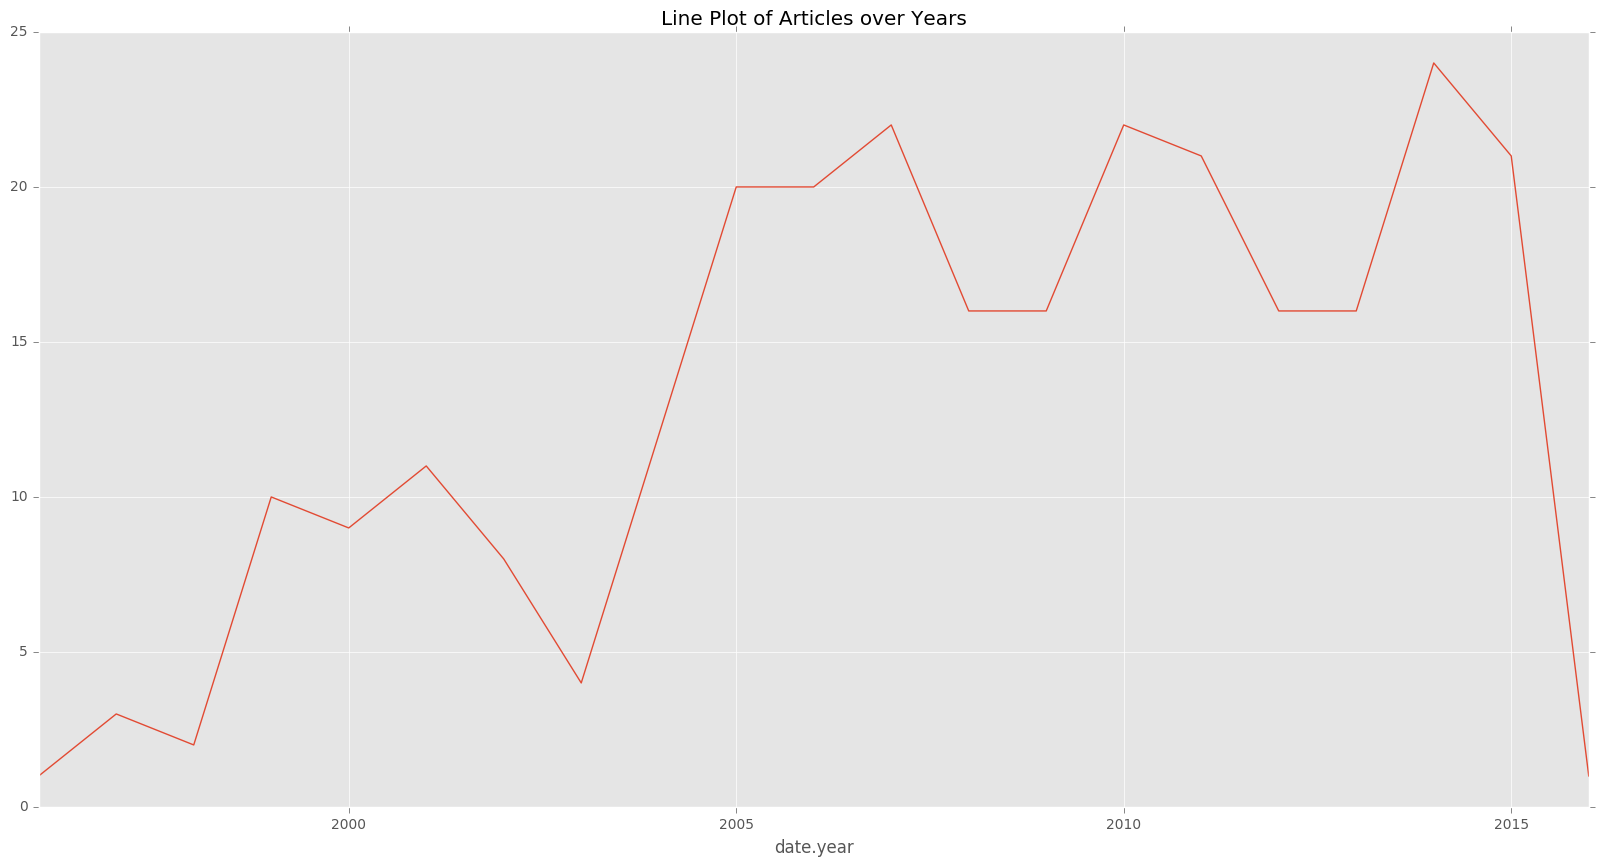

In [79]:
num_articles_per_year = db.groupby('date.year').size()
fig = figure(figsize=(20, 10))
plt.title("Line Plot of Articles over Years")
num_articles_per_year.plot()

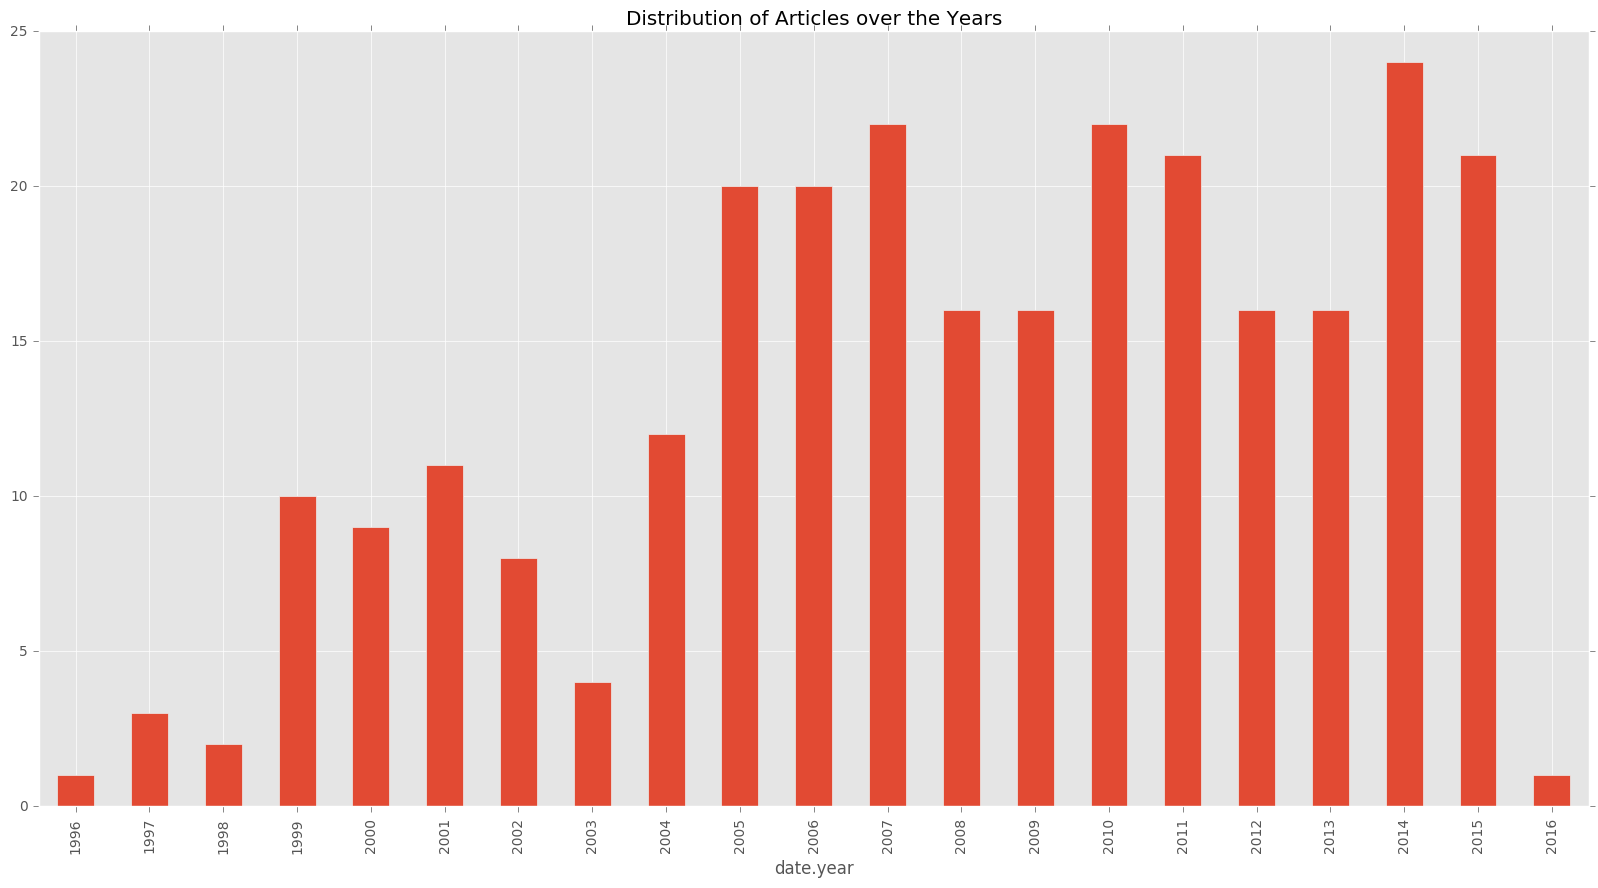

In [56]:
plt.figure();
fig = figure(figsize=(20, 10))
plt.title("Distribution of Articles over the Years")
num_articles_per_year.plot(kind='bar')

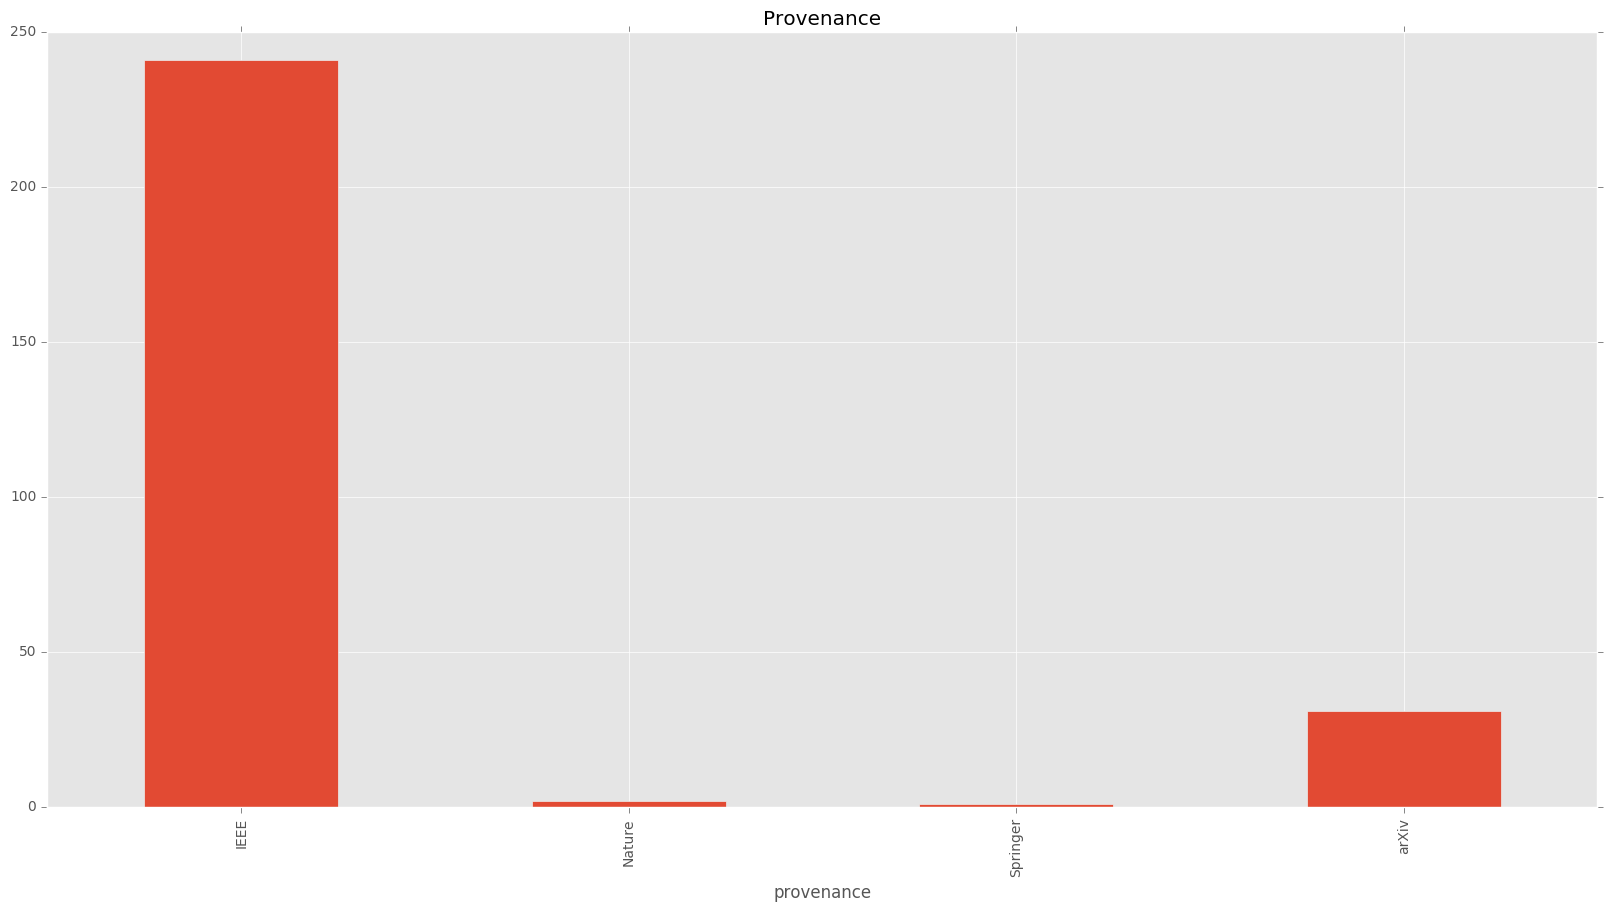

In [151]:
num_articles_per_api = db.groupby('provenance').size()
plt.figure();
fig = figure(figsize=(20, 10))
plt.title("Provenance")
counts.plot(kind='bar')

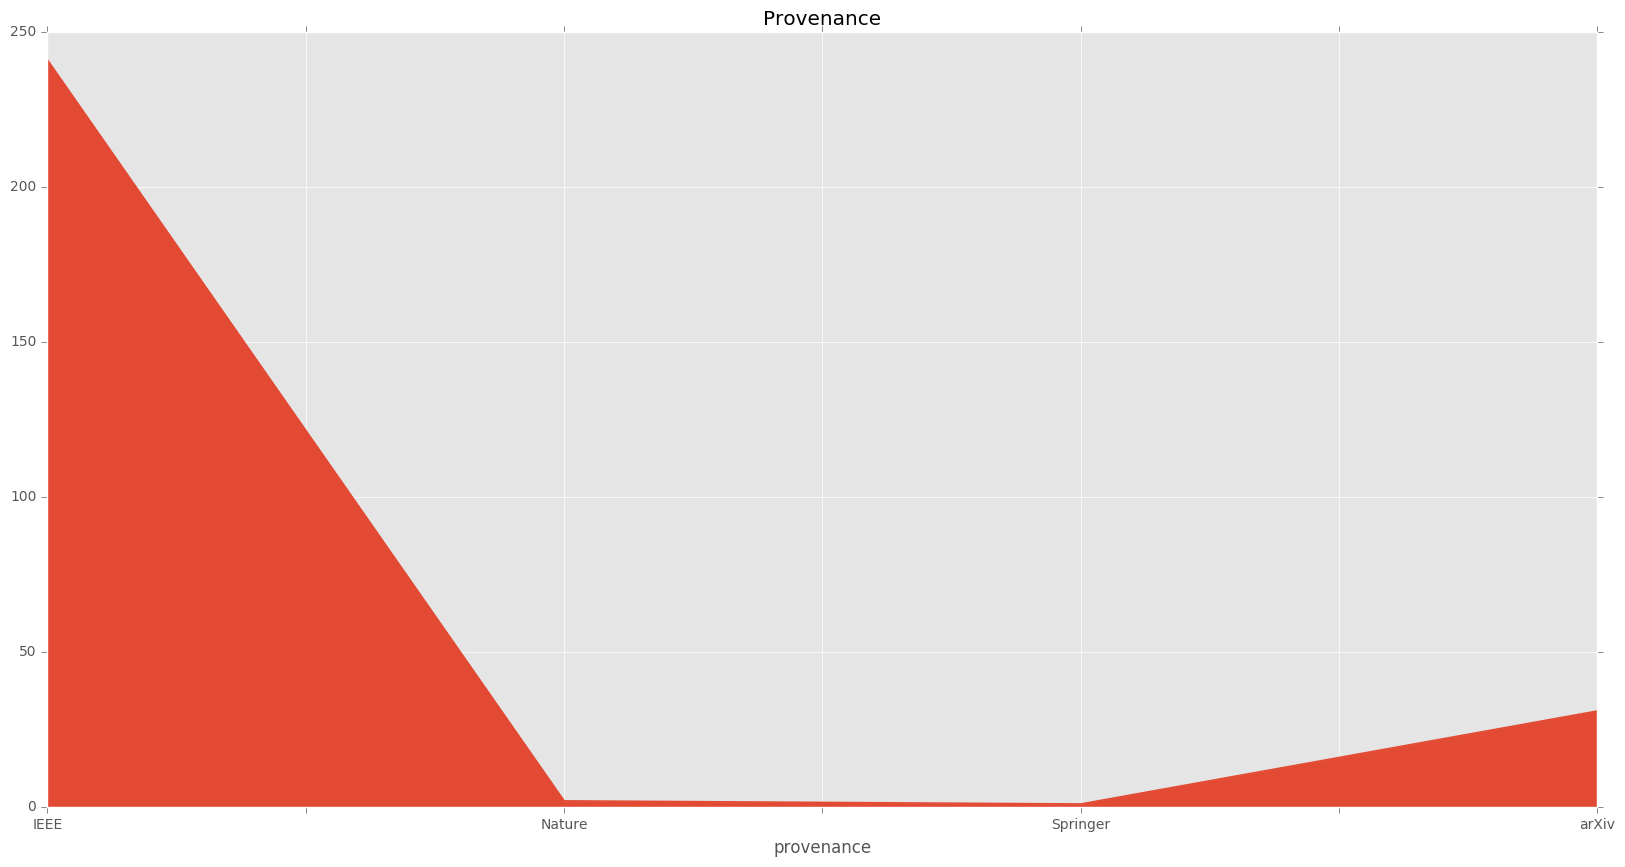

In [152]:
num_articles_per_api = db.groupby('provenance').size()
plt.figure();
fig = figure(figsize=(20, 10))
plt.title("Provenance")
counts.plot(kind='area')

In [58]:
key_words = []
year = []
for index, obj in enumerate(db['key_word']):
    if obj:
        for i in range(len(obj)):
            key_words.append(obj[i]['key_word'])
            year.append(db['date.year'][index])
labels_years = pd.DataFrame()
labels_years['name'] = key_words
labels_years['years'] = year

In [59]:
labels = pd.DataFrame()
labels['labels'], labels['values']= zip(*collections.Counter(key_words).items())

In [60]:
total = labels['values'].sum()
labels['percentage'] = [amount/total*100 for amount in labels['values']]

In [61]:
labels[labels['percentage'] > 0.5]

,labels,values,percentage
19,Resource management,15,0.554529
52,Markov processes,14,0.517560
80,Decision making,20,0.739372
103,genetic algorithms,16,0.591497
125,Statistics,20,0.739372
149,software agents,15,0.554529
166,iterative methods,23,0.850277
193,Games,79,2.920518
218,Computational modeling,22,0.813309
223,game theory,188,6.950092


In [63]:
authors = []
years = []
for count, nm in enumerate(db['author']):
    if nm:
        for i in range(len(nm)):
            authors.append(nm[i]['name'])
            years.append(db['date.year'][count])

In [81]:
# Fixining names 
fullname = []
for au in authors:
    name, lastname = au.split(" ")[0], au.split(" ")[-1]
    fullname.append('{}. {}'.format(name[0], lastname))
authors_and_year = pd.DataFrame()
authors_and_year['author'] = fullname
authors_and_year['year'] = years

In [134]:
# number of authors per year
authors_per_yer = authors_and_year.groupby('year').size()

In [172]:
temp = pd.DataFrame()
temp['Year'] = list(range(1996, 2017))
temp['Number_of_Articles'] = num_articles_per_year.values
temp['Number_of_Authors'] = authors_per_yer.values

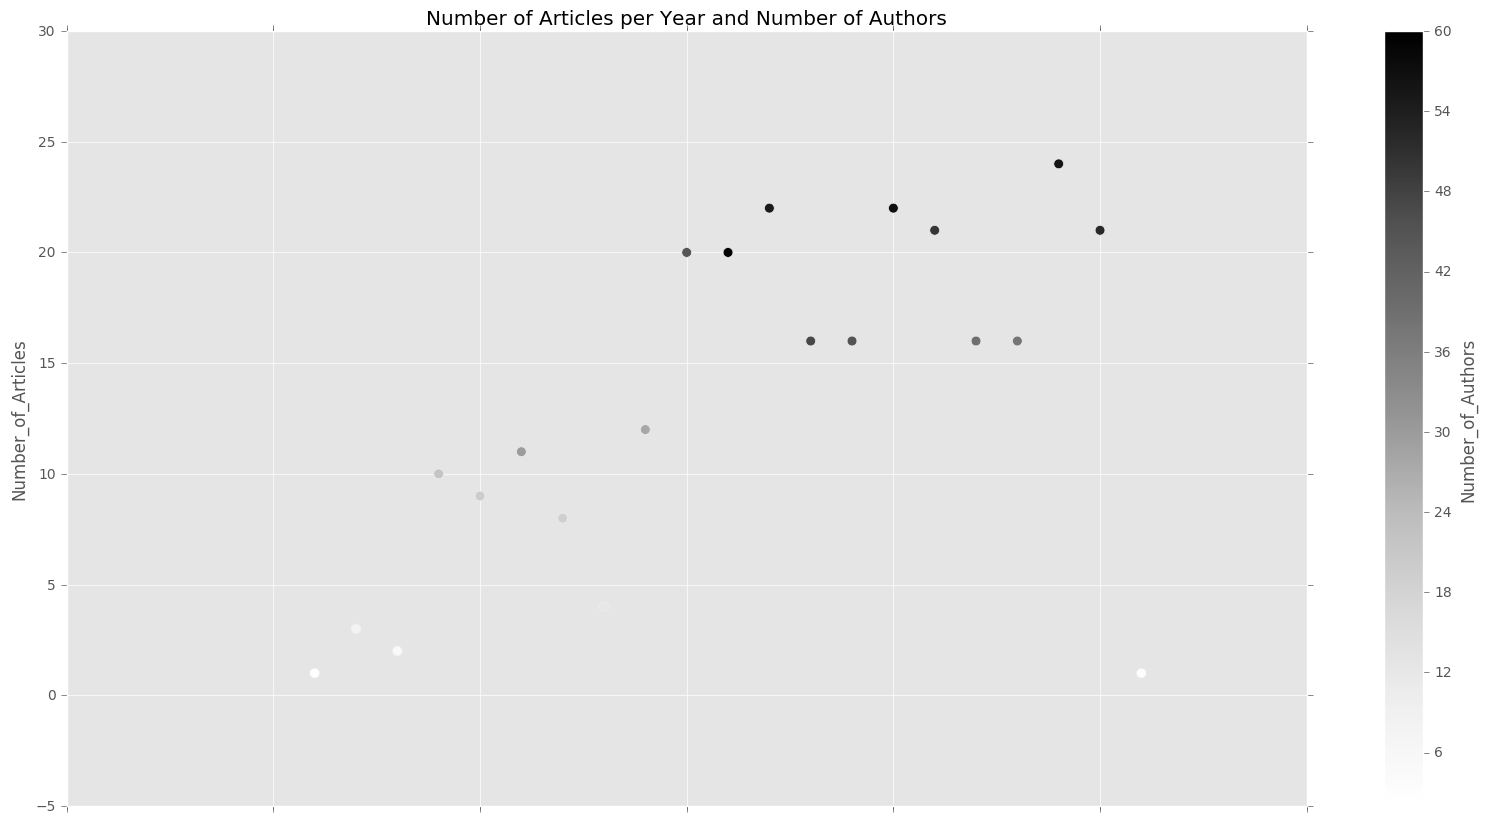

In [173]:
temp.plot(kind='scatter', x = 'Year', y = 'Number_of_Articles', c='Number_of_Authors', s=50, figsize=(20, 10),
          title='Number of Articles per Year and Number of Authors')

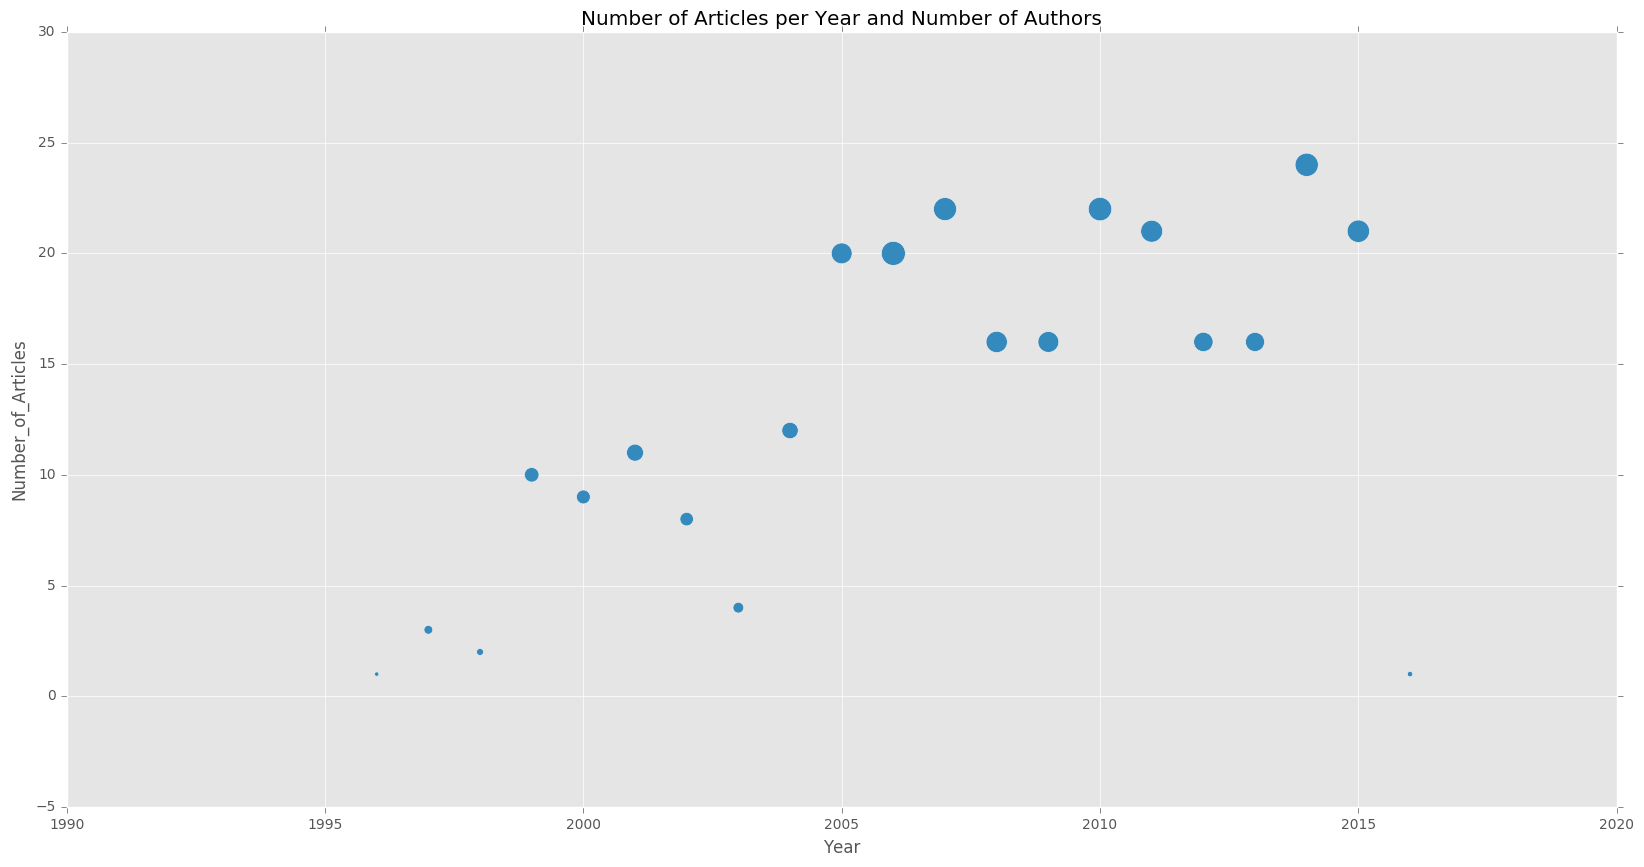

In [179]:
temp.plot(kind='scatter', x = 'Year', y = 'Number_of_Articles', s=temp['Number_of_Authors']*5, figsize=(20, 10),
          title='Number of Articles per Year and Number of Authors')